In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy.stats import poisson as po
from scipy.stats import geom as gm

from scipy.stats import expon,norm,binom
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os

In [4]:
os.chdir(r"C:\Users\Anonymous\Desktop\Advance Statistics\Bike Sharing Demand")

In [5]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
test = pd.read_csv("test.csv", parse_dates=['datetime'])
submit = pd.read_csv("sampleSubmission.csv")

In [ ]:
train

In [ ]:
test

In [ ]:
submit

In [6]:
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month 
train['year'] = train['datetime'].dt.year 
train['hour'] = train['datetime'].dt.hour
train['wday'] = train['datetime'].dt.weekday

In [7]:
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month 
test['year'] = test['datetime'].dt.year 
test['hour'] = test['datetime'].dt.hour
test['wday'] = test['datetime'].dt.weekday

In [8]:
X_train = train.drop(['datetime', 'count',
                      'casual', 'registered'],axis=1)
y_train = train['count']
X_test = test.drop('datetime', axis=1)

In [9]:
X_train['season'] = X_train['season'].astype(str)
X_train['weather'] = X_train['weather'].astype(str)
X_test['season'] = X_test['season'].astype(str)
X_test['weather'] = X_test['weather'].astype(str)


In [ ]:
X_test

In [ ]:
X_train

In [10]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_train.head(50)

In [11]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=23)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=23)

In [12]:
y_predict = dtr.predict(X_test)

In [13]:
y_predict[y_predict < 0] = 0
submit['count'] = y_predict
submit.to_csv('submit.csv',index = False)

In [14]:
import matplotlib.pyplot as plt

In [15]:
bikeols = ols("wday ~ count",data = train).fit()

In [16]:
bikeols= ols("wday ~ count",data= train).fit()
anova_lm(bikeols,typ=2)

,sum_sq,df,F,PR(>F)
count,0.228056,1.0,0.056749,0.811715
Residual,43739.649585,10884.0,NaN,NaN


In [17]:
bikeols= ols("wday ~ casual",data= train).fit()
anova_lm(bikeols,typ=2)

,sum_sq,df,F,PR(>F)
casual,2667.629560,1.0,706.912368,5.826341e-151
Residual,41072.248081,10884.0,NaN,NaN


In [18]:
bikeols= ols("wday ~ registered",data= train).fit()
anova_lm(bikeols,typ=2)

,sum_sq,df,F,PR(>F)
registered,311.775118,1.0,78.137431,1.109052e-18
Residual,43428.102523,10884.0,NaN,NaN


In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'wday'],
      dtype='object')

In [20]:
chart=train.groupby('wday')['casual'].mean()

In [21]:
import seaborn as sns

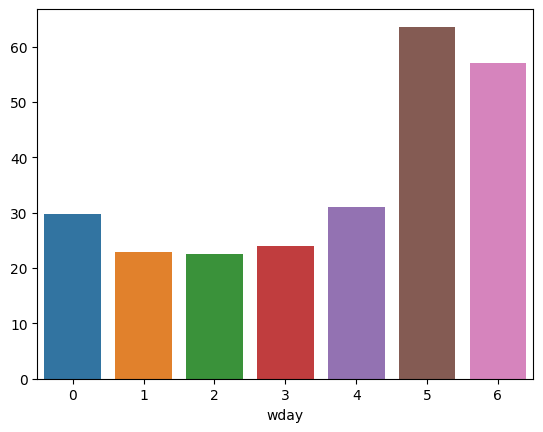

In [22]:
sns.barplot(x= chart.index,y= chart.values )
plt.show()

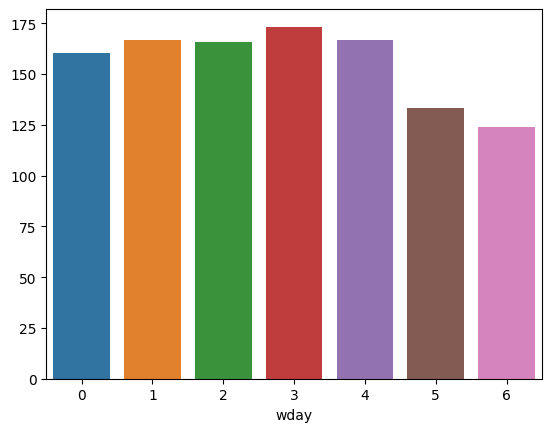

In [23]:
chart=train.groupby('wday')['registered'].mean()
sns.barplot(x= chart.index,y= chart.values )
plt.show()

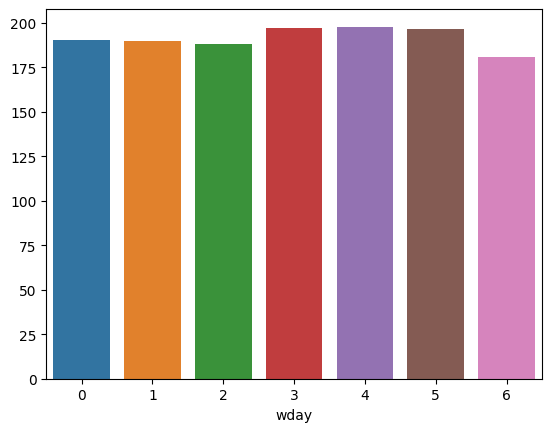

In [24]:
chart=train.groupby('wday')['count'].mean()
sns.barplot(x= chart.index,y= chart.values )
plt.show()